<a href="https://colab.research.google.com/github/PRUTHVIRAJ-H/UIDAI_3127/blob/main/DEMOGRAPHIC_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Load And Combine Data

In [85]:
dfs = []
for file in aadhar_files:
    df = pd.read_csv(file)
    dfs.append(df)

combined_aadhar_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame created with {len(combined_aadhar_df)} rows and {len(combined_aadhar_df.columns)} columns.")

Combined DataFrame created with 2071700 rows and 6 columns.


Displaying the first few rows to validate cleaning

In [86]:
combined_aadhar_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,18-11-2025,Karnataka,Hasan,573118,0,2
1,18-11-2025,Karnataka,Hasan,573124,1,3
2,18-11-2025,Karnataka,Hasan,573150,0,2
3,18-11-2025,Karnataka,Hassan,573113,0,1
4,18-11-2025,Karnataka,Hassan,573120,1,4


To understand the structure of data

In [87]:
combined_aadhar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


Dropping rows with missing data

In [88]:
print(f"Initial number of rows: {len(combined_aadhar_df)}")
combined_aadhar_df = combined_aadhar_df.dropna()
print(f"Number of rows after dropping NaN values: {len(combined_aadhar_df)}")

Initial number of rows: 2071700
Number of rows after dropping NaN values: 2071700


Removing Entries with invalid dates

In [89]:
print(f"Number of rows before date cleaning: {len(combined_aadhar_df)}")
combined_aadhar_df['date'] = pd.to_datetime(combined_aadhar_df['date'], format='%d-%m-%Y', errors='coerce')
combined_aadhar_df = combined_aadhar_df.dropna(subset=['date'])
print(f"Number of rows after date cleaning: {len(combined_aadhar_df)}")

Number of rows before date cleaning: 2071700
Number of rows after date cleaning: 2071700


Cleaning up age demographic

In [90]:
print(f"Number of rows before cleaning age demographic columns: {len(combined_aadhar_df)}")
combined_aadhar_df = combined_aadhar_df[(combined_aadhar_df['demo_age_5_17'] >= 0) & (combined_aadhar_df['demo_age_17_'] >= 0)]
print(f"Number of rows after cleaning age demographic columns: {len(combined_aadhar_df)}")

Number of rows before cleaning age demographic columns: 2071700
Number of rows after cleaning age demographic columns: 2071700


Cleaning State and District columns

In [91]:
print(f"Number of rows before cleaning string columns: {len(combined_aadhar_df)}")

combined_aadhar_df = combined_aadhar_df[combined_aadhar_df['state'].astype(str).str.strip().ne('')]

combined_aadhar_df = combined_aadhar_df[combined_aadhar_df['district'].astype(str).str.strip().ne('')]

print(f"Number of rows after cleaning string columns: {len(combined_aadhar_df)}")

Number of rows before cleaning string columns: 2071700
Number of rows after cleaning string columns: 2071700


In [92]:
combined_aadhar_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-11-18,Karnataka,Hasan,573118,0,2
1,2025-11-18,Karnataka,Hasan,573124,1,3
2,2025-11-18,Karnataka,Hasan,573150,0,2
3,2025-11-18,Karnataka,Hassan,573113,0,1
4,2025-11-18,Karnataka,Hassan,573120,1,4


In [93]:
combined_aadhar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   state          object        
 2   district       object        
 3   pincode        int64         
 4   demo_age_5_17  int64         
 5   demo_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 94.8+ MB


In [94]:
print(f"Shape of the cleaned DataFrame: {combined_aadhar_df.shape}")

Shape of the cleaned DataFrame: (2071700, 6)


Removing Duplicate Rows

In [95]:
initial_rows = len(combined_aadhar_df)
print(f"Number of rows before removing duplicates: {initial_rows}")

combined_aadhar_df = combined_aadhar_df.drop_duplicates()

rows_after_duplicates = len(combined_aadhar_df)
print(f"Number of rows after removing duplicates: {rows_after_duplicates}")

removed_rows = initial_rows - rows_after_duplicates
print(f"Number of duplicate rows removed: {removed_rows}")

Number of rows before removing duplicates: 2071700
Number of rows after removing duplicates: 1598099
Number of duplicate rows removed: 473601


In [96]:
combined_aadhar_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-11-18,Karnataka,Hasan,573118,0,2
1,2025-11-18,Karnataka,Hasan,573124,1,3
2,2025-11-18,Karnataka,Hasan,573150,0,2
3,2025-11-18,Karnataka,Hassan,573113,0,1
4,2025-11-18,Karnataka,Hassan,573120,1,4


In [97]:
combined_aadhar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598099 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date           1598099 non-null  datetime64[ns]
 1   state          1598099 non-null  object        
 2   district       1598099 non-null  object        
 3   pincode        1598099 non-null  int64         
 4   demo_age_5_17  1598099 non-null  int64         
 5   demo_age_17_   1598099 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.3+ MB


In [98]:
print(f"Shape of the cleaned DataFrame after duplicate removal: {combined_aadhar_df.shape}")

Shape of the cleaned DataFrame after duplicate removal: (1598099, 6)


Conclusions- No rows had missing values, but many of the rows were duplicated

Descriptive Statistics to help understand the data at large

In [99]:
combined_aadhar_df[['demo_age_5_17', 'demo_age_17_']].describe()

,demo_age_5_17,demo_age_17_
count,1.598099e+06,1.598099e+06
mean,2.251260e+00,2.064942e+01
std,1.391927e+01,1.177073e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00
50%,1.000000e+00,6.000000e+00
75%,2.000000e+00,1.500000e+01
max,2.690000e+03,1.616600e+04


Removing Outliers

In [100]:
initial_rows = len(combined_aadhar_df)
print(f"Number of rows before removing outliers: {initial_rows}")

Q1_5_17 = combined_aadhar_df['demo_age_5_17'].quantile(0.25)
Q3_5_17 = combined_aadhar_df['demo_age_5_17'].quantile(0.75)
IQR_5_17 = Q3_5_17 - Q1_5_17

lower_bound_5_17 = Q1_5_17 - 1.5 * IQR_5_17
upper_bound_5_17 = Q3_5_17 + 1.5 * IQR_5_17

combined_aadhar_df = combined_aadhar_df[
    (combined_aadhar_df['demo_age_5_17'] >= lower_bound_5_17) &
    (combined_aadhar_df['demo_age_5_17'] <= upper_bound_5_17)
]

Q1_17_ = combined_aadhar_df['demo_age_17_'].quantile(0.25)
Q3_17_ = combined_aadhar_df['demo_age_17_'].quantile(0.75)
IQR_17_ = Q3_17_ - Q1_17_

lower_bound_17_ = Q1_17_ - 1.5 * IQR_17_
upper_bound_17_ = Q3_17_ + 1.5 * IQR_17_

combined_aadhar_df = combined_aadhar_df[
    (combined_aadhar_df['demo_age_17_'] >= lower_bound_17_) &
    (combined_aadhar_df['demo_age_17_'] <= upper_bound_17_)
]

rows_after_outlier_removal = len(combined_aadhar_df)
print(f"Number of rows after removing outliers: {rows_after_outlier_removal}")

removed_rows_outliers = initial_rows - rows_after_outlier_removal
print(f"Number of rows removed due to outliers: {removed_rows_outliers}")

Number of rows before removing outliers: 1598099
Number of rows after removing outliers: 1357061
Number of rows removed due to outliers: 241038


Plotting histograms and KDE plots for 'demo_age_5_17' and 'demo_age_17_' columns to understand their distributions and identify patterns

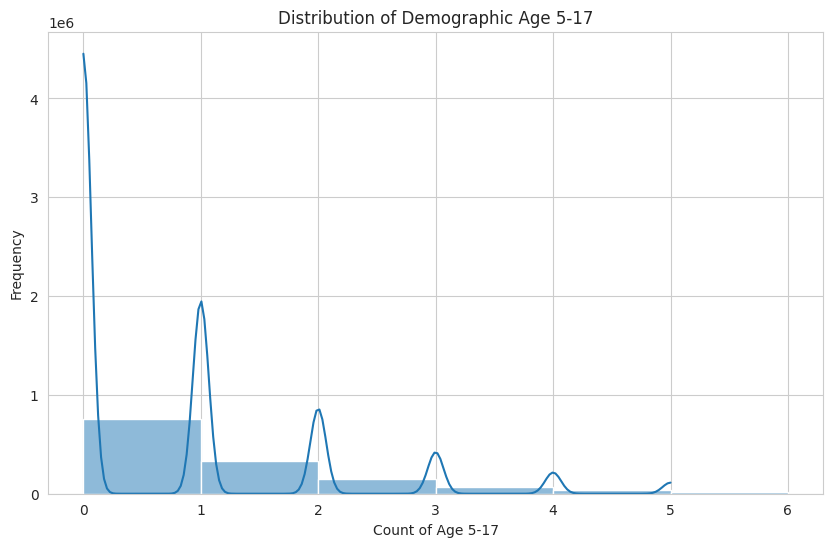

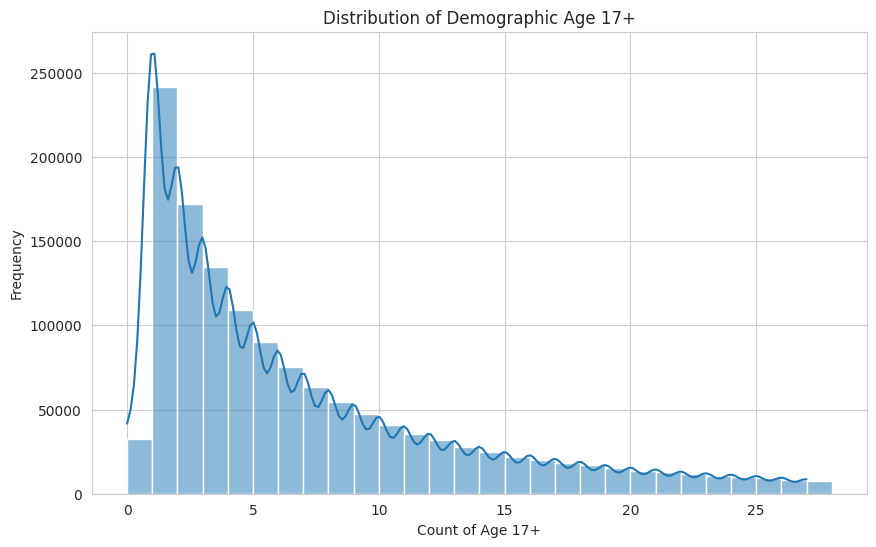

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(combined_aadhar_df['demo_age_5_17'], kde=True, bins=range(int(combined_aadhar_df['demo_age_5_17'].min()), int(combined_aadhar_df['demo_age_5_17'].max()) + 2))
plt.title('Distribution of Demographic Age 5-17')
plt.xlabel('Count of Age 5-17')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(combined_aadhar_df['demo_age_17_'], kde=True, bins=range(int(combined_aadhar_df['demo_age_17_'].min()), int(combined_aadhar_df['demo_age_17_'].max()) + 2))
plt.title('Distribution of Demographic Age 17+')
plt.xlabel('Count of Age 17+')
plt.ylabel('Frequency')
plt.show()

Calculating the total 'demo_age_5_17' and 'demo_age_17_' for the top 10 states and visualizing this data using a bar chart to highlight states with the highest demographic counts.

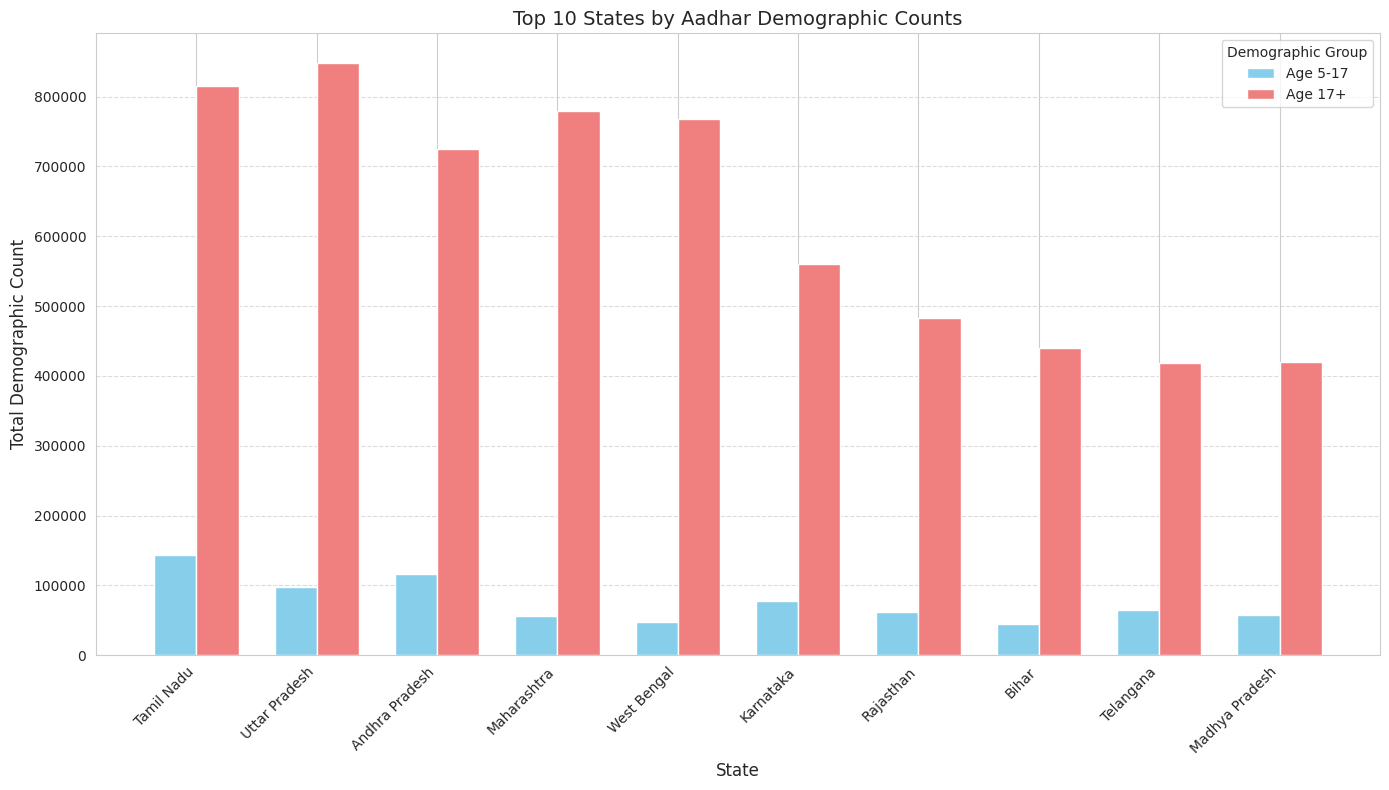

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns


state_demographics = combined_aadhar_df.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()


state_demographics['total_demographic_count'] = state_demographics['demo_age_5_17'] + state_demographics['demo_age_17_']
top_10_states = state_demographics.sort_values(by='total_demographic_count', ascending=False).head(10)


plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(top_10_states))

plt.bar(index, top_10_states['demo_age_5_17'], bar_width, label='Age 5-17', color='skyblue')
plt.bar([i + bar_width for i in index], top_10_states['demo_age_17_'], bar_width, label='Age 17+', color='lightcoral')


plt.xlabel('State', fontsize=12)
plt.ylabel('Total Demographic Count', fontsize=12)
plt.title('Top 10 States by Aadhar Demographic Counts', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], top_10_states['state'], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Demographic Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculating the total 'demo_age_5_17' and 'demo_age_17_' for the top 10 districts and visualizing this data using a bar chart to highlight districts with the highest demographic counts.

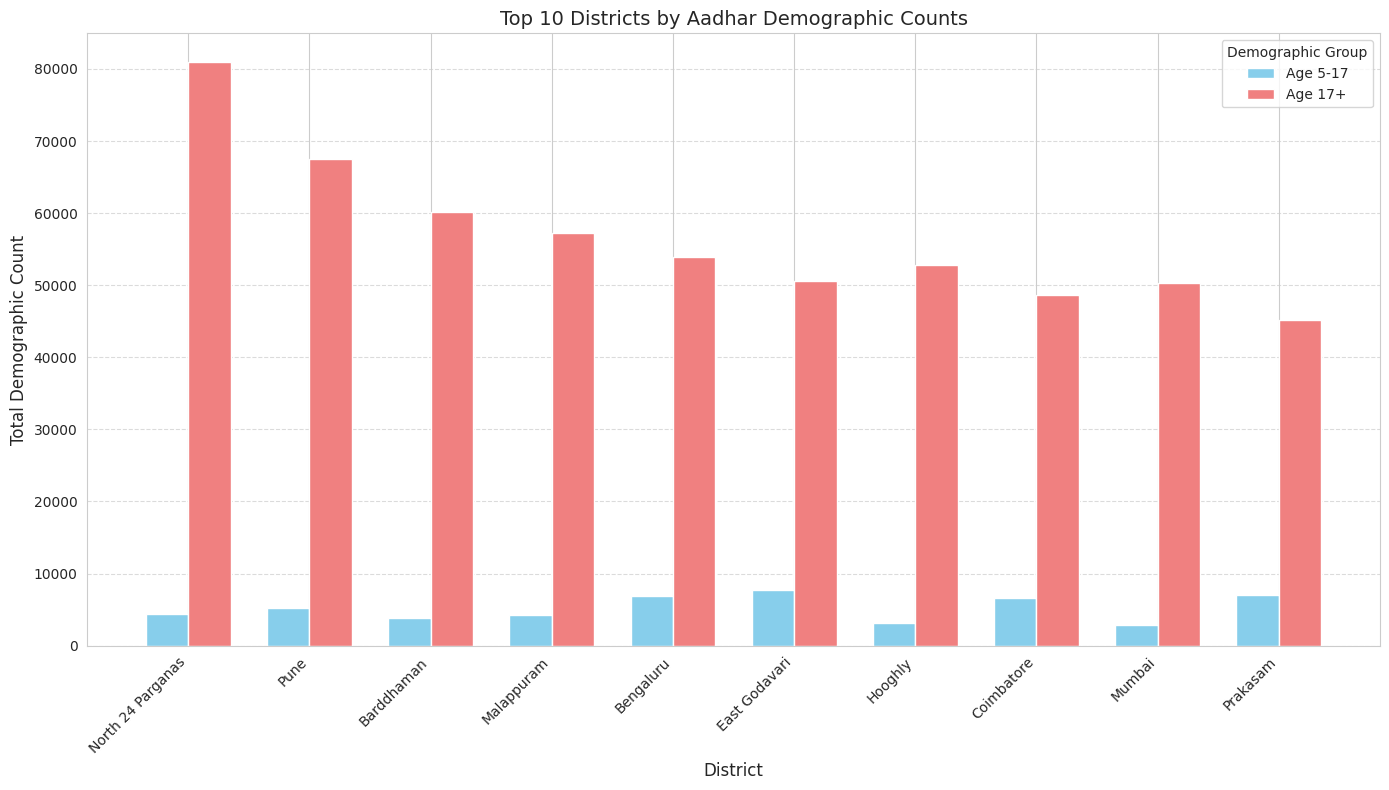

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


district_demographics = combined_aadhar_df.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()


district_demographics['total_demographic_count'] = district_demographics['demo_age_5_17'] + district_demographics['demo_age_17_']
top_10_districts = district_demographics.sort_values(by='total_demographic_count', ascending=False).head(10)


plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(top_10_districts))

plt.bar(index, top_10_districts['demo_age_5_17'], bar_width, label='Age 5-17', color='skyblue')
plt.bar([i + bar_width for i in index], top_10_districts['demo_age_17_'], bar_width, label='Age 17+', color='lightcoral')


plt.xlabel('District', fontsize=12)
plt.ylabel('Total Demographic Count', fontsize=12)
plt.title('Top 10 Districts by Aadhar Demographic Counts', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], top_10_districts['district'], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Demographic Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aggregating the demographic data by date to observe trends over time for 'demo_age_5_17' and 'demo_age_17_' and plotting a line plot for the same

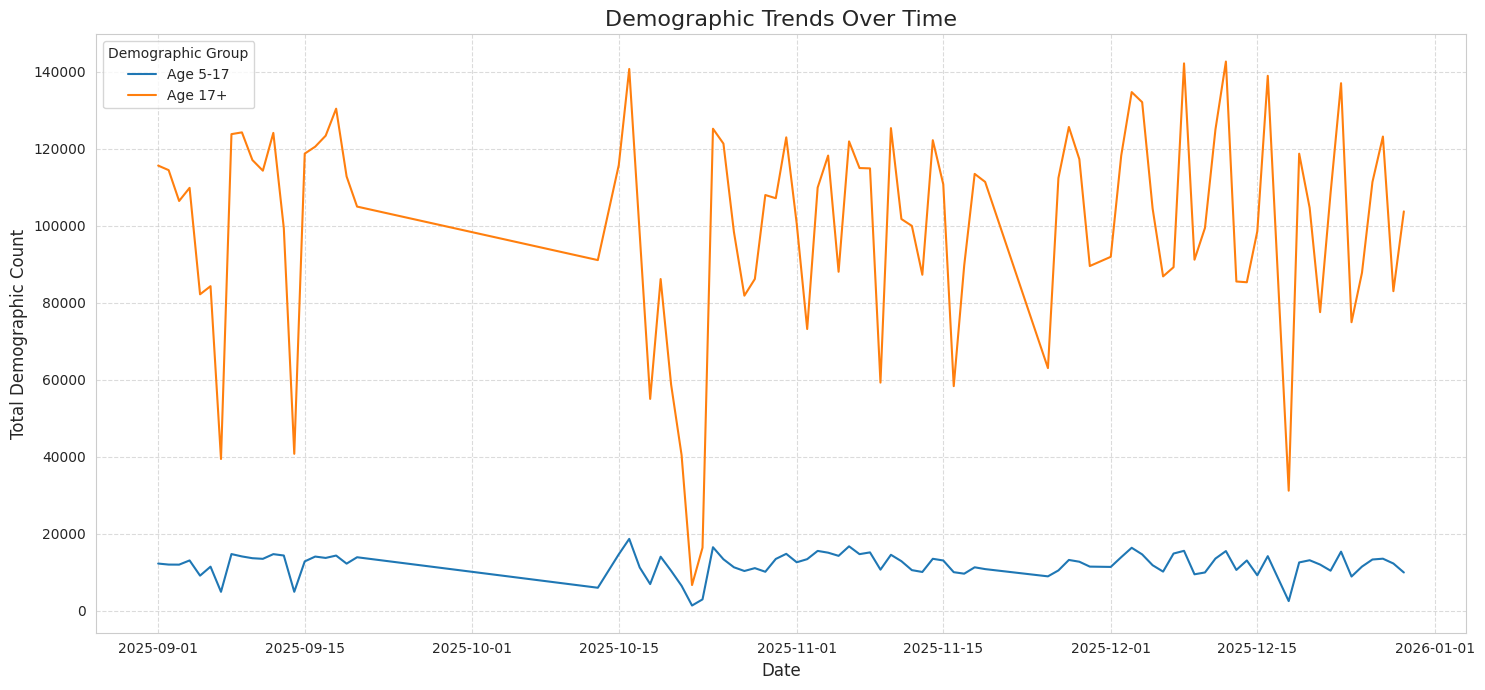

In [104]:
demographics_over_time = combined_aadhar_df.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=demographics_over_time, x='date', y='demo_age_5_17', label='Age 5-17')
sns.lineplot(data=demographics_over_time, x='date', y='demo_age_17_', label='Age 17+')

plt.title('Demographic Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Demographic Count', fontsize=12)
plt.legend(title='Demographic Group', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculating the Pearson correlation matrix for the numerical columns ('pincode', 'demo_age_5_17', 'demo_age_17_') in the combined_aadhar_df to understand the linear relationships between them.

In [105]:
numerical_cols = ['pincode', 'demo_age_5_17', 'demo_age_17_']
correlation_matrix = combined_aadhar_df[numerical_cols].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
                pincode  demo_age_5_17  demo_age_17_
pincode        1.000000      -0.032672     -0.057438
demo_age_5_17 -0.032672       1.000000      0.448170
demo_age_17_  -0.057438       0.448170      1.000000


Using a heatmap to visualize the matrix

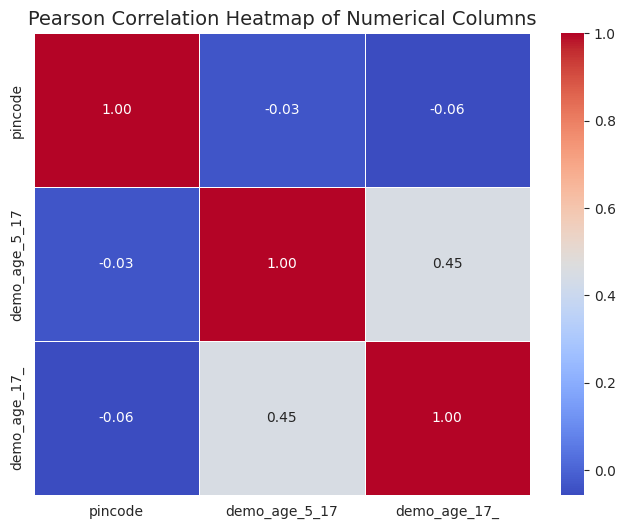

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Heatmap of Numerical Columns', fontsize=14)
plt.show()

The lack of redundant/missing data is good, as it shows there are no issues in the data collection. However, there are a lot of duplicate entries. This may be due to an error in entering or transmission, but either way, adds excessive strain to the servers. This issue needs to be looked into in more detail and the root cause needs to be fixed.

The line plot of demographic vs age shows us that the intake of different demographics is dependent on the date, showing that the bottleneck lies in the centers themselves and unproper planing

The moderate positive correlation between the two age demographic groups is an expected finding, as areas with more individuals in one age group often tend to have a higher overall population, which can lead to a corresponding increase in other age groups. This would also